In [34]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lab 7: The Impact of Minimum Wage on Employment

## Overview

We are going to replicate a study conducted by **[Card and Krueger in 1994](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)** that investigates the relationship between a rise in the minimum wage and employment.

## Background

[Economic theories](https://www.frbsf.org/research-and-insights/publications/economic-letter/2015/12/effects-of-minimum-wage-on-employment/) have long suggested that increases in the minimum wage lead to a reduction in employment for at least two reasons:

1. **Businesses are less likely to hire** and will rather invest in other resources that are now cheaper because of the wage increase.
2. **Higher salaries will induce businesses to raise their prices** to compensate for their greater costs; as prices increase, we expect fewer buyers, which will lead to lower demand and employment.

These theories have found [mixed support](https://www.nber.org/papers/w12663), but the discussion is still very much open within the policy world, as states discuss the opportunity to raise their minimum wage to help local populations to face increasing living costs. Discussions are currently occurring in **[New Jersey](https://www.nytimes.com/2019/01/17/nyregion/nj-minimum-wage.html)** and **[Illinois](https://kmox.radio.com/articles/discussions-underway-raise-illinois-minimum-wage-15hour)** to raise the minimum wage to **$15/hour** ([New York](https://www.nytimes.com/2018/12/31/nyregion/15-minimum-wage-new-york.html?module=inline) has successfully passed this same raise in 2018).

## The Original Study

One of the first studies looking at this policy problem was **Card and Krueger’s**. They applied a difference-in-difference design to look at two groups of fast-food restaurants:

- Fast-food restaurants in **New Jersey** where the minimum wage **increased** from \\$4.25 to $5.05 per hour (treatment group)
- Fast-food restaurants in **Pennsylvania** where the minimum wage did not change (control group).

They collected data before and after the minimum wage was approved. Data used in the study can be downloaded [here](https://github.com/DS4PS/PROG-EVAL-III/blob/master/TEXTBOOK/DATA/DID_Example.csv).

## Research Question
 - Does an increase in the minimum wage affect employment rates?
## Hypothesis
- An increase in the minimum wage is negatively correlated with employment.


## Part 1: Understanding the Research 

<!-- BEGIN QUESTION -->

**Question 1.1:** How does using a *difference-in-differences* research design affect the *validity* and reliability of findings in studies on changes in minimum wage and their impact on employment rate?

*Hint*: Think about the parallell trend assumption.

The difference-in-differences design improves validity by controlling for time invariant factors that affect both the treatment and control groups. 

This helps isolate the causal effect of the minimum wage increase on employment. Itts reliability depends on the parallel trends assumption, which requires both groups to have followed similar employment trends before the policy change. 
    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.2:** What's the difference between the `Group` the `Treatment` columns? 

The Treatment column gives information of Pre-treatment and post-treatment. 
The Group column gives lets us know if it is New Jersey that is the treatment group or Pennsylvania that is the control group 


<!-- END QUESTION -->

<hr>

## Part 2: Data Cleaning

We now proceed with loading in the data used in the original 1994 study. It cointains the following variables:

| Variable Name | Description                                          |
|---------------|------------------------------------------------------|
| ID            | Unique identifier for fast food                     |
| Treatment     | Pre-treatment (=0) and post-treatment (=1)          |
| Group         | 1 if NJ (treatment); 0 if PA (Control)              |
| Empl          | # of full time employees                             |
| C.Owned       | If owned by a company (=1) or not (=0)               |
| Hours.Opening | Number hours open per day                            |
| Soda          | Price of medium soda, including tax                  |
| Fries         | Price of small fries, including tax                  |
| Chain         | 1 = BK, 2 = KFC, 3 = Roys, 4 = Wendys                |
| SouthJ        | South New Jersey                                     |
| CentralJ      | Central New Jersey                                   |
| NorthJ        | North New Jersey                                     |
| PA1           | Northeast suburbs of Philadelphia                    |
| PA2           | Easton and other PA areas                            |
| Shore         | New Jersey Shore                                     |


In [36]:
dd_df = pd.read_csv('data/DID_Example.csv')
dd_df.head()

,ID,Chain,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment
0,46,1,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0
1,49,2,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0
2,506,2,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0
3,56,4,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0
4,61,4,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0


<!-- BEGIN QUESTION -->

**Question 2.1:** What does each row in `dd_df` represent?

each row represents a fast food restaurantchain in NJ or PA 

<!-- END QUESTION -->

**Question 2.2:** Summarize the data above such that it shows count, mean, and other useful statistics for each column.

*Hint*: use `.describe()`

In [37]:
dd_df_summarized = dd_df.describe()



dd_df_summarized

,ID,Chain,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,802.000000,820.000000,820.000000,790.000000,775.000000,820.000000
mean,246.507317,2.117073,0.226829,0.153659,0.426829,0.087805,0.104878,0.085366,0.807317,8.238778,0.343902,12.650000,1.044911,0.931471,0.500000
std,148.141276,1.109819,0.419037,0.360841,0.494919,0.283184,0.306583,0.279596,0.394647,8.298807,0.475299,4.763907,0.091059,0.107942,0.500305
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.410000,0.670000,0.000000
25%,119.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,10.000000,1.000000,0.850000,0.000000
50%,237.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,14.000000,1.050000,0.940000,0.500000
75%,372.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,16.000000,1.090000,1.010000,1.000000
max,522.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,1.000000,24.000000,1.490000,1.370000,1.000000


In [38]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3:** What's the average number of employees per fast-food restaurant?

In [39]:
mean_employees = dd_df['Empl'].mean()

mean_employees

np.float64(8.238778054862843)

In [40]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4:** What percentage of fast-food restaurants are part of the treatment group? (e.g. 40 instead of 0.4)

In [41]:
per_treatment = dd_df['Group'].mean()*100

per_treatment

np.float64(80.73170731707317)

In [42]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5:** Notice that our `Chain` column is a categorical variable hidden as a numeric value! One-hot encode this column and save the your work along with the original `dd_df` in `dd_df_encoded`. After one-hot encoding `Chain`, you should *drop* the original column and *drop* `Roys` to avoid multicolinearity. This will be helpful for our analysis below.

*Hint*: use `pd.get_dummies()` for one-hot encoding. 

In [43]:
chain_dummies = pd.get_dummies(dd_df['Chain'].replace({1:'BK',2:'KFC', 3:'Roys', 4:'Wendys'}),  dtype= int)

dd_df_encoded = pd.concat([dd_df, chain_dummies], axis=1) 
dd_df_encoded.drop(columns=['Chain', 'Roys'], inplace=True)

dd_df_encoded

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment,BK,KFC,Wendys
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,1,0,0
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,0,1,0
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,0,1,0
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,0,0,1
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,0,1,0
816,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,0,1,0
817,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,0,0,0
818,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,0,0,1


In [44]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<hr>

## Part 3: Analysis: Estimating the Difference-in-Differences Model

We now estimate the Difference-in-Differences model based on the model below. Along with the **Group** and **Treatment** variables, we also include a set of control variables to account for differences across restaurants. 

Here we consider the variables:  
- **opening hours**—suggesting that fast-food restaurants open for more hours might need more employees. 
- prices of **fries and sodas**, under the assumption that more expensive fast food might have more resources to hire additional staff.


<!-- BEGIN QUESTION -->

**Question 3.1:** Using the general diff-in-diff model below, specify the model we're about to estimate using $\LaTeX$. Hint: Don't forget to add your controls. Feel free to copy and reformat the Latex Code below. 

$(1.1)$ 

$$Y = \beta_0 + \beta_1 \cdot \text{Treatment} + \beta_2 \cdot \text{Post} + \beta_3 \cdot \text{Treatment} \times \text{Post} + \text{Controls} + e$$


$$ Empl = \beta_0 + \beta_1 \cdot \text{Treatment} + \beta_2 \cdot \text{Post} + \beta_3 \cdot \text{Treatment} \times \text{Post} +\beta_4 \cdot \text{Hours.Opening}+ \beta_5 \cdot \text{Soda}+ \beta_5 \cdot \text{Fries}+ e$$


<!-- END QUESTION -->

**Question 3.2:** Now, rename the relevant column names of the `dd_df` to fit the equation specified in (1.1). Instead of having `Group` and `Treatment`, they should be `Treatment` and `Post`, both of which take on binary values. This will simplify our coming analysis!

In [45]:
dd_df = dd_df_encoded.rename(columns={'Group':'Treatment', 'Treatment': 'Post'})
dd_df

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Treatment,Empl,C.Owned,Hours.Opening,Soda,Fries,Post,BK,KFC,Wendys
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,1,0,0
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,0,1,0
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,0,1,0
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,0,0,1
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,0,1,0
816,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,0,1,0
817,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,0,0,0
818,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,0,0,1


In [46]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3:** Now, using `statsmodels` run the diff-in-diff from equation (1.1). Run this regression *without* your controls.

*Hint*: [here](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) is how to run OLS in statsmodels. 

*Hint*: think of what data type `X` and `y` should be.  

In [47]:
# Create your Treatment*Post interaction term.
dd_df['Treatment_Post'] = dd_df['Treatment']*dd_df['Post']

# Define your dependent variable.
y = dd_df['Empl'] 

# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post', 'Treatment_Post']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results_33 =  model.fit()

# Print the summary of the model
print(results_33.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 14 Mar 2025   Prob (F-statistic):                nan
Time:                        13:04:15   Log-Likelihood:                    nan
No. Observations:                 820   AIC:                               nan
Df Residuals:                     816   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

In [48]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4:** You notice that your output from the `print(results.summary())` gives you all NaN's as cofficients and std errors. This may be because of NaNs in the data. For the sake of simplicity, feel free to just drop all the NaNs for now.

In [49]:
dd_df = dd_df.dropna()
dd_df

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Treatment,Empl,C.Owned,Hours.Opening,Soda,Fries,Post,BK,KFC,Wendys,Treatment_Post
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,1,0,0,0
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,0,1,0,0
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,0,1,0,0
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,0,0,1,0
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,0,1,0,1
816,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,0,1,0,1
817,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,0,0,0,1
818,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,0,0,1,1


In [50]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5:** Repeat the analysis from `q3.3` and estimate the Diff-in-Diff estimator. Again, do not include controls from `q3.1` here. 

Note: Please set your `.fit()` variable to `results_35`. 

In [51]:
dd_df['Treatment_Post'] = dd_df['Treatment']*dd_df['Post']

# Define your dependent variable.
y = dd_df['Empl'] 

# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post', 'Treatment_Post']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results_35 =  model.fit()

# Print the summary of the model
print(results_35.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.695
Date:                Fri, 14 Mar 2025   Prob (F-statistic):             0.0450
Time:                        13:04:15   Log-Likelihood:                -2655.9
No. Observations:                 757   AIC:                             5320.
Df Residuals:                     753   BIC:                             5338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.4408      0.929     11.

/tmp/ipykernel_122/1785273536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_df['Treatment_Post'] = dd_df['Treatment']*dd_df['Post']


In [52]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6:** We notice that our $R^2$ (one of many goodness-of-fit parameters we can use) is very low. To aid our analysis, Include the controls you specified in the $\LaTeX$ equation above.

Note: Please set your `.fit()` variable to `results_37`. 

In [53]:
dd_df['Treatment_Post'] = dd_df['Treatment']*dd_df['Post']

# Define your dependent variable.
y = dd_df['Empl'] 

# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post', 'Treatment_Post', 'Soda', 'Fries','Hours.Opening']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results_37 =  model.fit()

# Print the summary of the model
print(results_37.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           5.02e-13
Time:                        13:04:15   Log-Likelihood:                -2625.0
No. Observations:                 757   AIC:                             5264.
Df Residuals:                     750   BIC:                             5296.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2470      3.451      0.

/tmp/ipykernel_122/2088443665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_df['Treatment_Post'] = dd_df['Treatment']*dd_df['Post']


In [54]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.7:** Controlling for opening hours, and prices of soda & fries - What is the diff-in-diff estimator for the impact on introducing a minimum wage in New Jersey? Remember to include units and give a brief interpretation of our findings following the SSS framework from above. Be sure to mention how your $R^2$ changed, and it's practical implications. 

*Note*: Please format your markdown nicely (like the following cell) to aid readability.

#### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

##### 1. Sign

- **Expected Sign**: What sign did you expect the estimated parameter(s) to have? Why?
- **Actual Sign**: Does your estimate(s) have this sign (i.e., are you surprised or reassured by your results)?

##### 2. Significance

- **Statistical Significance**: Is the estimate(s) statistically different from zero?
- **T-Statistic**: What is the t-statistic of this hypothesis?

##### 3. Size

- **Effect on Dependent Variable**: How do changes in this variable affect the dependent variable according to your estimation?
- **Economic Significance**: Is this an economically meaningful effect size?

This framework is borrowed from Berkeley's EEP C118 course. See more [here.](https://are.berkeley.edu/courses/EEP118/spring2014/section/Handout4_2014.pdf)

1. Sign:
We expect a negative coefficient for the policy impact because
in theory, increasing the minimum wage leads to lower employment due to higher labor costs. However coefficient for the DiD estimator (Treatment_Post) is +4.1275. This is contradictory with the theory and it suggests that  after the minimum wage increase employment in NJ's fast-food sector increased by 4.13 employees per restaurant compared to PA.

2. Significance
The p-value is 0.004, which is < 0.01. So there is a strong evidence that the observed increase in employment is not due to random chance. Moreover, 
the t-statistic for this estimate is 2.87. Since 2.877 > 2.576, we reject the null hypothesis and confirm that the effect of the minimum wage increase is statistically significant.
                                                              
3. Size
This is an economically meaningful effect size. After the wage increase, fast-food restaurants in NJ employed about 4.13 more workers per restaurant on average compared to PA.
Economic Significance: It challenges the classical labor demand theory saying that raising the minimum wage will reduce employment. Instead, employment appears to have increased, possibly due to higher worker retention or increased productivity. 


<!-- END QUESTION -->

<hr>

## Part 4: Visualizing the diff-in-diff estimator

Below, we plot the difference in difference estimates from question 3.5 and embark on a visual interpretation of our findings.

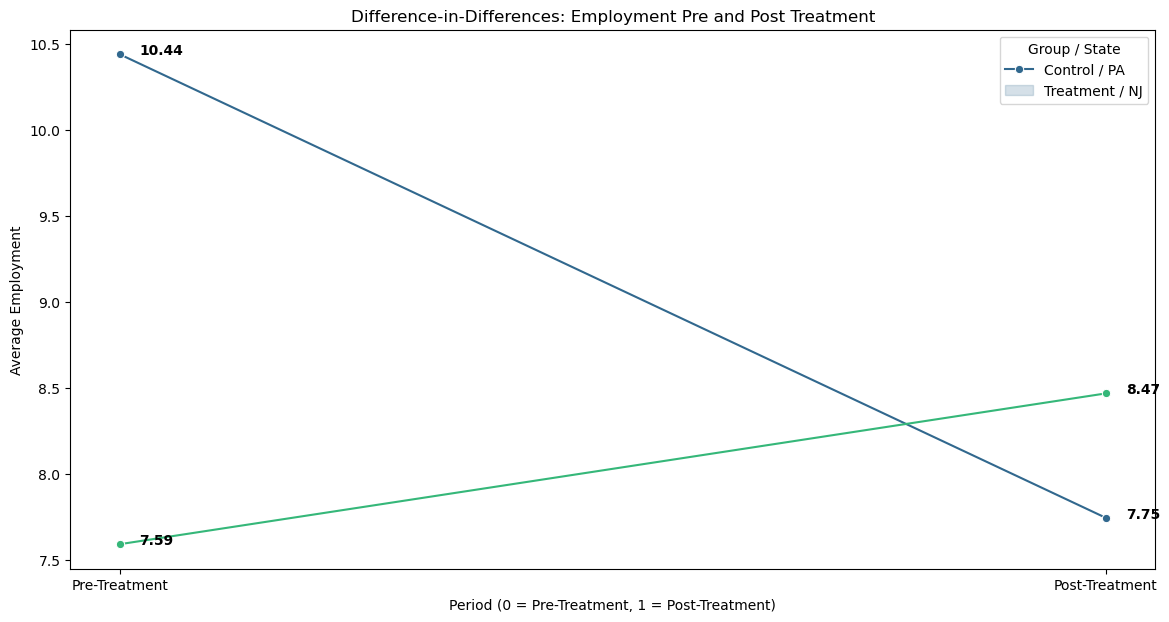

<Figure size 600x500 with 0 Axes>

In [55]:
# First, calculate mean employment by group and time
mean_empl = dd_df.groupby(['Treatment', 'Post'])['Empl'].mean().reset_index()

# Now, plot these averages with lines to show the change from pre to post for each group
plt.figure(figsize=(14, 7))
sns.lineplot(x='Post', y='Empl', hue='Treatment', data=mean_empl, marker='o', palette='viridis')

plt.title('Difference-in-Differences: Employment Pre and Post Treatment')
plt.xlabel('Period (0 = Pre-Treatment, 1 = Post-Treatment)')
plt.ylabel('Average Employment')
plt.xticks(ticks=[0, 1], labels=['Pre-Treatment', 'Post-Treatment'])
plt.legend(title='Group / State', labels=['Control / PA', 'Treatment / NJ'])

# Adding annotations for clarity
for line in range(mean_empl.shape[0]):
    plt.text(mean_empl.Post[line]+0.02, mean_empl.Empl[line], 
             f"{mean_empl.Empl[line]:.2f}", horizontalalignment='left', 
             size='medium', color='black', weight='semibold')

plt.figure(figsize=(6, 5)) 
plt.tight_layout()
plt.show();

**Question 4.1:** Now, let's make sure we can visually interpret our findings. Match the regression output numbers below to the appropriate regression equation.

**Equations:**

a) $const$

b) $const + \text{Treatment}$

c) $const + \text{Post}$

d) $const + \text{Post} + \text{Treatment} + \text{Treatment*Post}$

**Regression Output Numbers:**

1. $10.44$
2. $7.59$
3. $7.75$
4. $8.47$


In [56]:
a = 10.44 # These should be either 10.44, or 7.59, or 7.75, or 8.47
b = 7.59
c = 7.75
d = 8.47 


In [57]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2:** Using the numbers from the visualization above, calculate the difference in difference estimate. It should match your estimate from question 3.5.

In [58]:
DD_estimate = (d-b) - (c-a) 
#(Post-Treatment−Pre-Treatment) NJ -   (Post-Treatment−Pre-Treatment) PA
DD_estimate

3.5700000000000003

In [59]:
grader.check("q4_2")

q4_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.3:** Looking back to your response to question 1.1 and the plot from above, what are some limitations in Card's Difference and Differences model's setup. 

*Hint*: Think of the assumptions used in Difference in Differences. 

The model assumes that NJ and PA would have had similar employment trends if the minimum wage hadn’t changed. But the plot shows that employment in PA was already dropping before the wage increase, which could make the results misleading.  

It also doesn’t take into account other economic factors that might have played a role in employment changes. Plus, some workers from PA might have crossed into NJ for higher wages, making it look like NJ's employment went up because of the minimum wage increase when it could just be worker migration.

<!-- END QUESTION -->

<hr>

### Conclusion
Congratulations, you have finished lab 7! We hope you enjoyed the lab - you're one step closer in becoming a master replicator of economics papers...

Have a great week!

Justin, Luis, and Dawson.


---
## Sources

*FOUNDATIONS OF PROGRAM EVALUATION III REGRESSION TOOLS FOR CAUSAL ANALYSIS* by Data Science for 
Public Service (https://ds4ps.org/PROG-EVAL-III/index.html), retrieved 22 Feb 2024.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [60]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2_2 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_5 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_3 results: All test cases passed!

    q3_4 results: All test cases passed!

    q3_5 results: All test cases passed!

    q3_6 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!
